In [1]:
#Failide lugemiseks Colabis
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/Andmeteadus/Projekt/DataScienceProject")

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import ast

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [14]:
df = pd.read_csv("Averaged_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   float64
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

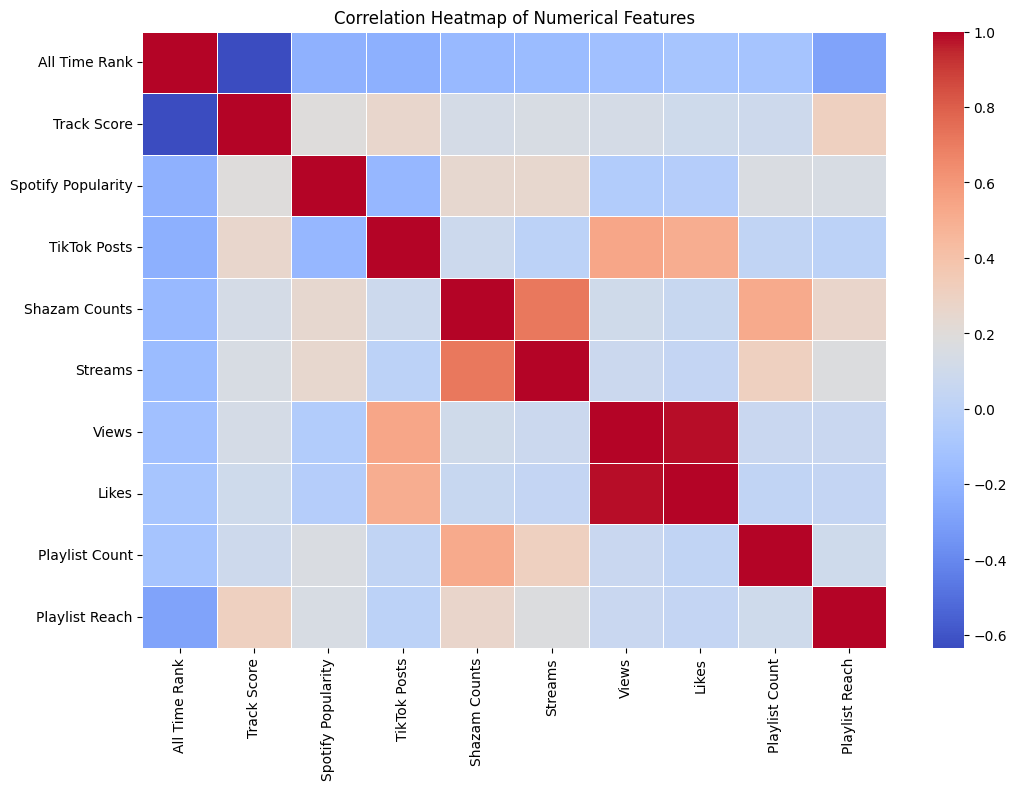

In [8]:
# CORRELATION MATRIX
num_cols = [
    "All Time Rank",
    "Track Score",
    "Spotify Streams",
    "Spotify Playlist Count",
    "Spotify Playlist Reach",
    "Spotify Popularity",
    "YouTube Views",
    "YouTube Likes",
    "TikTok Posts",
    "TikTok Likes",
    "TikTok Views",
    "YouTube Playlist Reach",
    "Apple Music Playlist Count",
    "AirPlay Spins",
    "SiriusXM Spins",
    "Deezer Playlist Count",
    "Deezer Playlist Reach",
    "Amazon Playlist Count",
    "Pandora Streams",
    "Pandora Track Stations",
    "Soundcloud Streams",
    "Shazam Counts"
]

num_cols = [
    "All Time Rank",
    "Track Score",
    "Spotify Popularity",
    "TikTok Posts",
    "Shazam Counts",
    "Streams",
    "Views",
    "Likes",
    "Playlist Count",
    "Playlist Reach"
]

num_df = df[num_cols]
corr_matrix = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            cmap="coolwarm",
            annot=False,
            linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

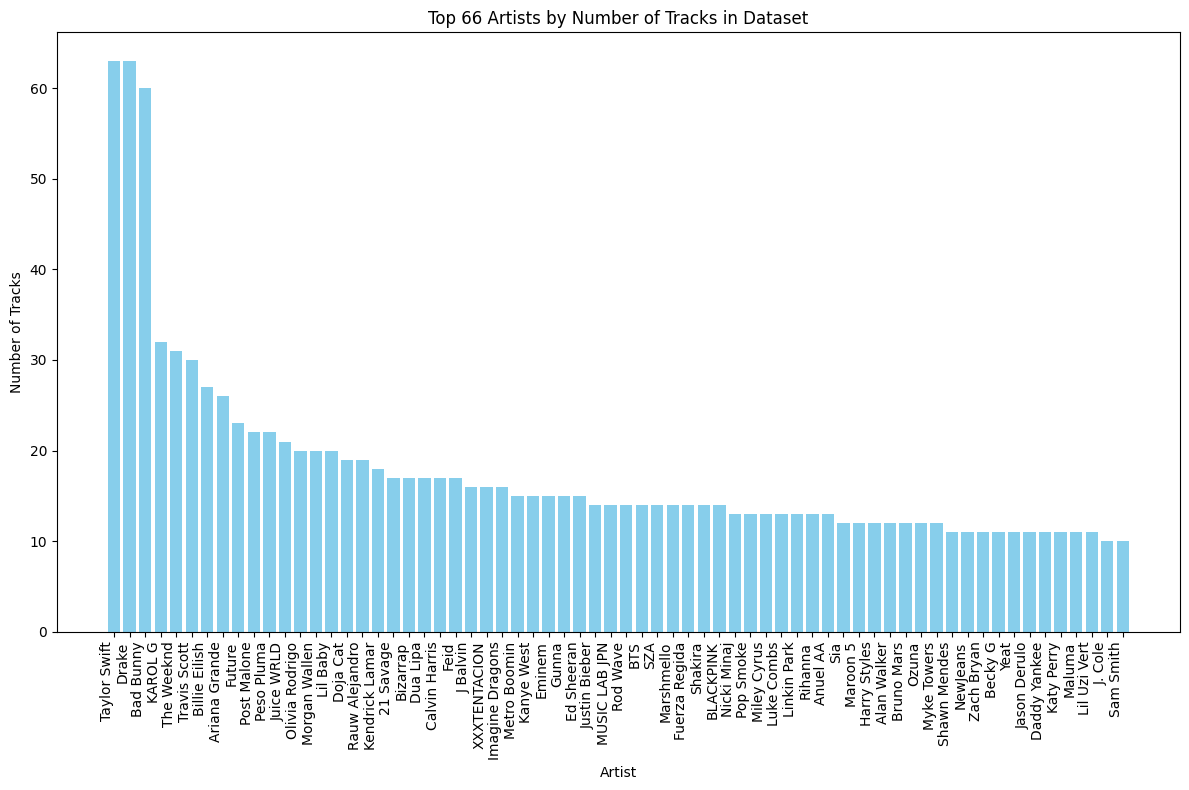

In [11]:
# TOP N ARTIST FREQUENCY
n = 66
artist_freq = df["Artist"].value_counts().head(n)

plt.figure(figsize=(12, 8))
plt.bar(artist_freq.index, artist_freq.values, color="skyblue")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.title(f"Top {n} Artists by Number of Tracks in Dataset")
plt.tight_layout()
plt.show()

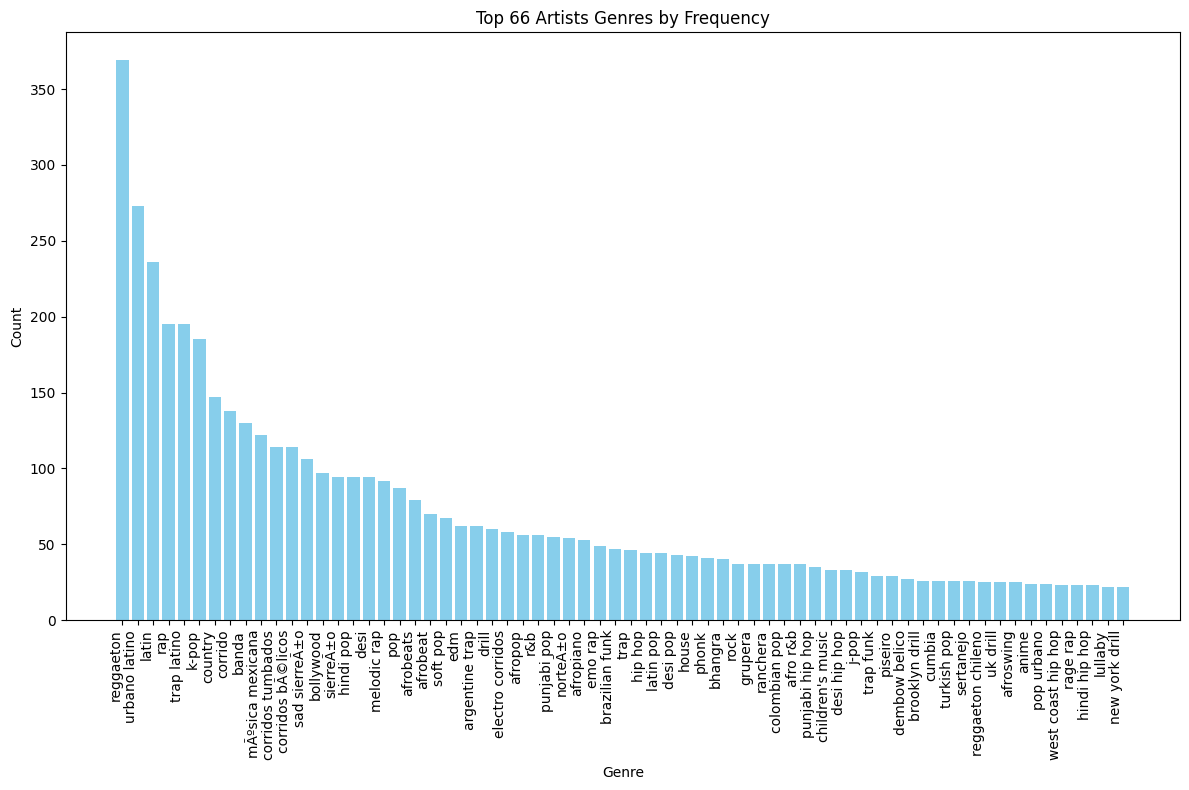

In [15]:
# TOP N ARTIST GENRES FREQUENCY
n = 66
df["Artist Genres"] = df["Artist Genres"].apply(ast.literal_eval)

all_genres = [genre for sublist in df["Artist Genres"] for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = [genre for genre in genre_counts.most_common(n)]

genres = [x[0] for x in top_genres]
counts = [x[1] for x in top_genres]

plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color="skyblue")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title(f"Top {n} Artists Genres by Frequency")
plt.tight_layout()
plt.show()

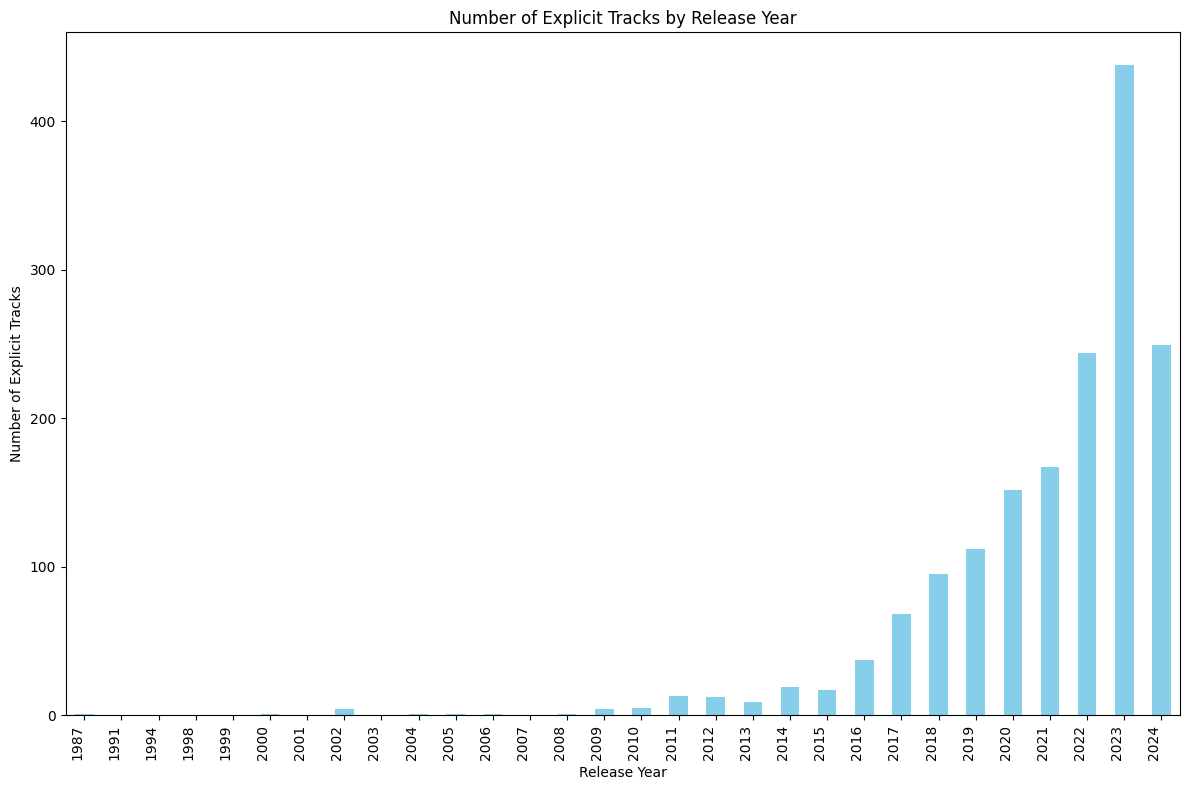

In [16]:
# TRACK EXPLCIT FREQUENCY BY RELEASE YEAR
df["Release Date"] = pd.to_datetime(df["Release Date"])
df["Release Date"] = df["Release Date"].dt.year

explicit_counts = df.groupby("Release Date")["Explicit Track"].sum()

plt.figure(figsize=(12, 8))
explicit_counts.plot(kind="bar", color="skyblue")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Release Year")
plt.ylabel("Number of Explicit Tracks")
plt.title("Number of Explicit Tracks by Release Year")
plt.tight_layout()
plt.show()

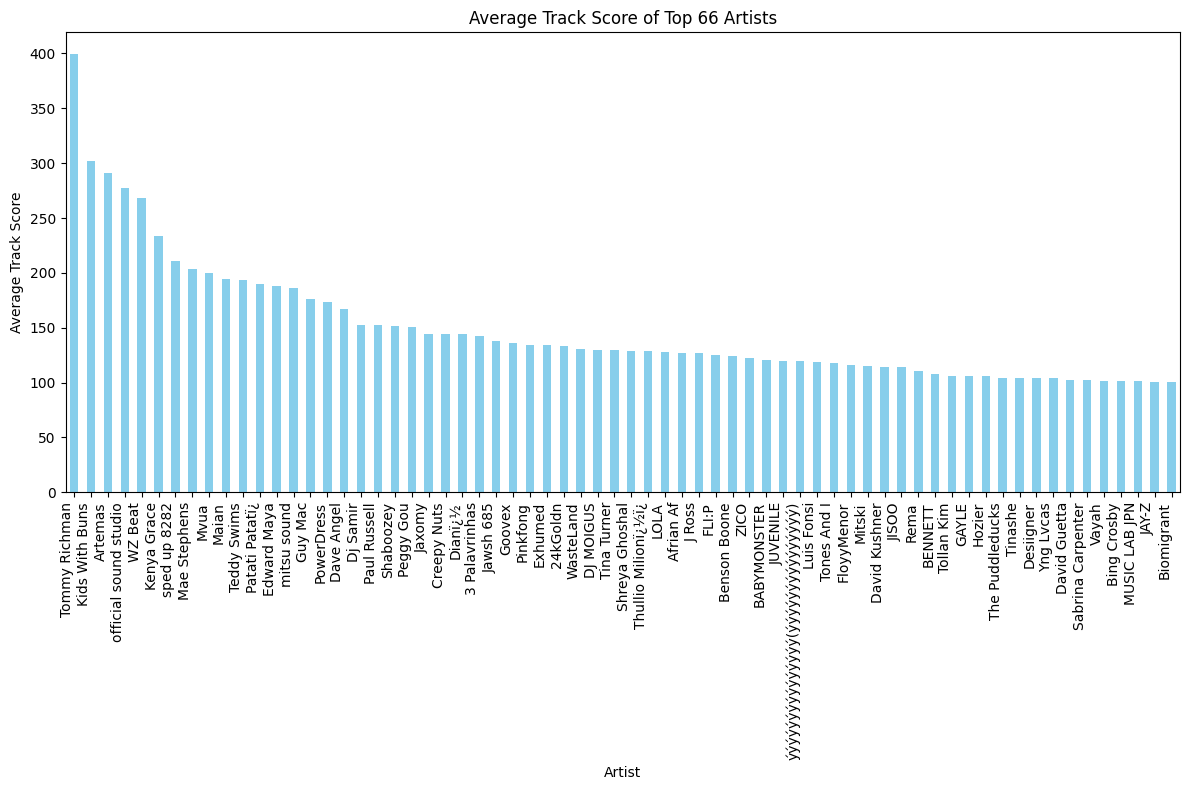

In [21]:
# AVERAGE TRACK SCORE OR SPOTIFY POPULARITY OF N ARTIST
n = 66

avg = df.groupby("Artist")["Track Score"].mean()
#avg = df.groupby("Artist")["Spotify Popularity"].mean()

avg = avg.sort_values(ascending=False).head(n)

plt.figure(figsize=(12, 8))
avg.plot(kind="bar", color="skyblue")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Artist")
plt.ylabel("Average Track Score")
plt.title(f"Average Track Score of Top {n} Artists")
#plt.title(f"Average Spotify Popularity of Top {n} Artists")
plt.tight_layout()
plt.show()